In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import skew, kurtosis
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime


In [2]:
# Load pre-COVID dataset
pre_covid_data = pd.read_csv('precovid_dataset.csv')
#print(pre_covid_data.head())
print(pre_covid_data.shape)
print(pre_covid_data.info())

(1237, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1237 non-null   object 
 1   Open       1237 non-null   float64
 2   High       1237 non-null   float64
 3   Low        1237 non-null   float64
 4   Close      1237 non-null   float64
 5   Adj Close  1237 non-null   float64
 6   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.8+ KB
None


In [3]:
pre_covid_data['Date'] = pd.to_datetime(pre_covid_data['Date'])
#add a 'quarter' column to the dataset for further analysis
pre_covid_data['quarter'] = pre_covid_data['Date'].dt.quarter
#add a 'year',  'month','Day' column to the dataset for further analysis
pre_covid_data['year'] = pre_covid_data['Date'].dt.year
pre_covid_data['month'] = pre_covid_data['Date'].dt.month
pre_covid_data['day'] = pre_covid_data['Date'].dt.day

In [4]:
print(pre_covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Open       1237 non-null   float64       
 2   High       1237 non-null   float64       
 3   Low        1237 non-null   float64       
 4   Close      1237 non-null   float64       
 5   Adj Close  1237 non-null   float64       
 6   Volume     1237 non-null   int64         
 7   quarter    1237 non-null   int32         
 8   year       1237 non-null   int32         
 9   month      1237 non-null   int32         
 10  day        1237 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(4), int64(1)
memory usage: 87.1 KB
None


In [5]:
print(pre_covid_data.head(5))

        Date         Open         High          Low        Close    Adj Close  \
0 2015-01-02  2058.899902  2072.360107  2046.040039  2058.199951  2058.199951   
1 2015-01-05  2054.439941  2054.439941  2017.339966  2020.579956  2020.579956   
2 2015-01-06  2022.150024  2030.250000  1992.439941  2002.609985  2002.609985   
3 2015-01-07  2005.550049  2029.609985  2005.550049  2025.900024  2025.900024   
4 2015-01-08  2030.609985  2064.080078  2030.609985  2062.139893  2062.139893   

       Volume  quarter  year  month  day  
0  2708700000        1  2015      1    2  
1  3799120000        1  2015      1    5  
2  4460110000        1  2015      1    6  
3  3805480000        1  2015      1    7  
4  3934010000        1  2015      1    8  


In [6]:
print(pre_covid_data.tail(5))

           Date         Open         High          Low        Close  \
1232 2019-11-22  3111.409912  3112.870117  3099.260010  3110.290039   
1233 2019-11-25  3117.439941  3133.830078  3117.439941  3133.639893   
1234 2019-11-26  3134.850098  3142.689941  3131.000000  3140.520020   
1235 2019-11-27  3145.489990  3154.260010  3143.409912  3153.629883   
1236 2019-11-29  3147.179932  3150.300049  3139.340088  3140.979980   

        Adj Close      Volume  quarter  year  month  day  
1232  3110.290039  3235270000        4  2019     11   22  
1233  3133.639893  3514310000        4  2019     11   25  
1234  3140.520020  4600450000        4  2019     11   26  
1235  3153.629883  3035470000        4  2019     11   27  
1236  3140.979980  1743420000        4  2019     11   29  


In [7]:
# Load post-COVID dataset
post_covid_data = pd.read_csv('postcovid_dataset.csv')
#print(post_covid_data.head())
print(post_covid_data.shape)
print(post_covid_data.info())

(1047, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1047 non-null   object 
 1   Open       1047 non-null   float64
 2   High       1047 non-null   float64
 3   Low        1047 non-null   float64
 4   Close      1047 non-null   float64
 5   Adj Close  1047 non-null   float64
 6   Volume     1047 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 57.4+ KB
None


In [8]:
post_covid_data['Date'] = pd.to_datetime(post_covid_data['Date'])
#add a 'quarter' column to the dataset for further analysis
post_covid_data['quarter'] = post_covid_data['Date'].dt.quarter
#add a 'year',  'month','Day' column to the dataset for further analysis
post_covid_data['year'] = post_covid_data['Date'].dt.year
post_covid_data['month'] = post_covid_data['Date'].dt.month
post_covid_data['day'] = post_covid_data['Date'].dt.day

In [9]:
print(post_covid_data.head(5))

        Date         Open         High          Low        Close    Adj Close  \
0 2019-12-02  3143.850098  3144.310059  3110.780029  3113.870117  3113.870117   
1 2019-12-03  3087.409912  3094.969971  3070.330078  3093.199951  3093.199951   
2 2019-12-04  3103.500000  3119.379883  3102.530029  3112.760010  3112.760010   
3 2019-12-05  3119.209961  3119.449951  3103.760010  3117.429932  3117.429932   
4 2019-12-06  3134.620117  3150.600098  3134.620117  3145.909912  3145.909912   

       Volume  quarter  year  month  day  
0  3285750000        4  2019     12    2  
1  3671580000        4  2019     12    3  
2  3702980000        4  2019     12    4  
3  3360480000        4  2019     12    5  
4  3483310000        4  2019     12    6  


In [10]:
print(post_covid_data.tail(5))

           Date         Open         High          Low        Close  \
1042 2024-01-24  4888.560059  4903.680176  4865.939941  4868.549805   
1043 2024-01-25  4886.660156  4898.149902  4869.339844  4894.160156   
1044 2024-01-26  4888.910156  4906.689941  4881.470215  4890.970215   
1045 2024-01-29  4892.950195  4929.310059  4887.399902  4927.930176   
1046 2024-01-30  4925.890137  4931.089844  4916.270020  4924.970215   

        Adj Close      Volume  quarter  year  month  day  
1042  4868.549805  4330030000        1  2024      1   24  
1043  4894.160156  4020430000        1  2024      1   25  
1044  4890.970215  3353400000        1  2024      1   26  
1045  4927.930176  3525160000        1  2024      1   29  
1046  4924.970215  3836130000        1  2024      1   30  


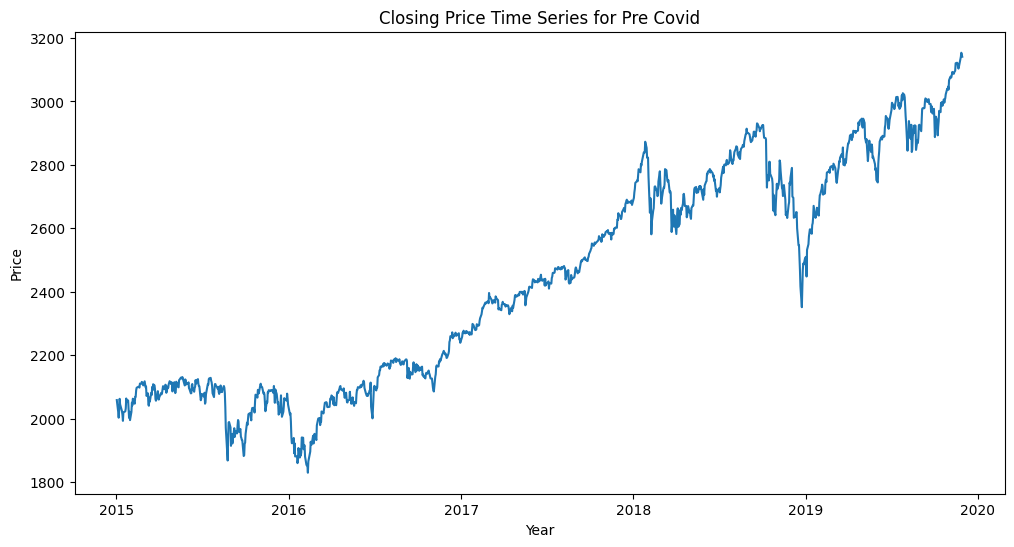

In [11]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(pre_covid_data['Date'],pre_covid_data["Close"], label="Close Price")
plt.title("Closing Price Time Series for Pre Covid")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


In [12]:
# Calculate a 20-day moving average
pre_covid_data["MA20"] = pre_covid_data["Close"].rolling(window=20).mean()

# Plot the closing price with the moving average
plt.figure(figsize=(12, 6))
plt.plot(pre_covid_data['Date'],pre_covid_data["Close"], label="Close Price")
plt.plot(pre_covid_data['Date'],pre_covid_data["MA20"], label="20-Day Moving Average")
plt.title("Closing Price with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

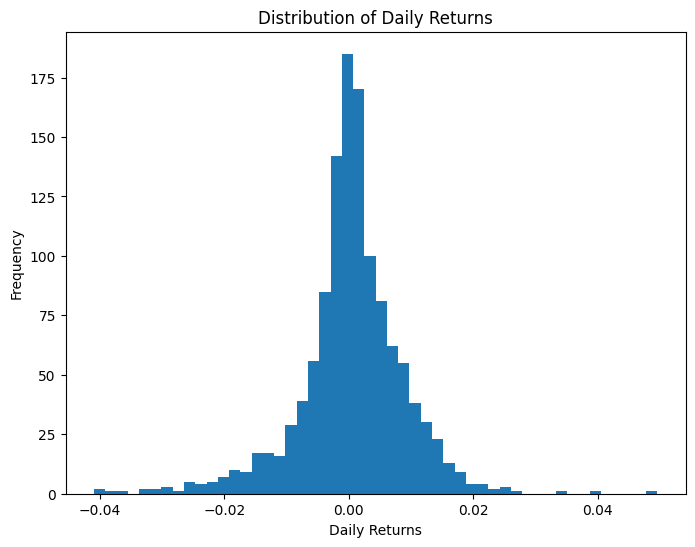

Volatility: 0.008514479235391084


In [13]:
# Calculate daily returns
pre_covid_data["Returns"] = pre_covid_data["Close"].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(8, 6))
plt.hist(pre_covid_data["Returns"], bins=50)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

# Calculate volatility (standard deviation of returns)
volatility = pre_covid_data["Returns"].std()
print("Volatility:", volatility)

In [14]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(post_covid_data['Date'],post_covid_data["Close"], label="Close Price")
plt.title("Closing Price Time Series for Post Covid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [15]:
# Calculate a 20-day moving average
post_covid_data["MA20"] = post_covid_data["Close"].rolling(window=20).mean()

# Plot the closing price with the moving average
plt.figure(figsize=(12, 6))
plt.plot(post_covid_data['Date'],post_covid_data["Close"], label="Close Price")
plt.plot(post_covid_data['Date'],post_covid_data["MA20"], label="20-Day Moving Average")
plt.title("Closing Price with 20-Day Moving Average")
plt.xlabel("Moving Average")
plt.ylabel("Price")
plt.legend()
plt.show()

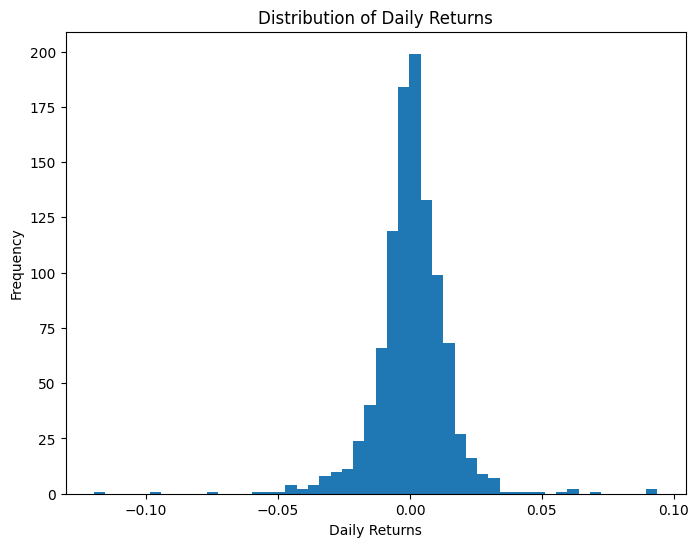

Volatility: 0.01424849025803725


In [16]:
# Calculate daily returns
post_covid_data["Returns"] = post_covid_data["Close"].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(8, 6))
plt.hist(post_covid_data["Returns"], bins=50)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

# Calculate volatility (standard deviation of returns)
volatility = post_covid_data["Returns"].std()
print("Volatility:", volatility)

In [17]:
# Lets look into the null values
print(pre_covid_data.isnull().sum())
print(post_covid_data.isnull().sum())

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
quarter       0
year          0
month         0
day           0
MA20         19
Returns       1
dtype: int64
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
quarter       0
year          0
month         0
day           0
MA20         19
Returns       1
dtype: int64


In [18]:
columns_to_drop = ['Adj Close', 'Volume','Date']
pre_dropped = pre_covid_data.drop(columns_to_drop, axis=1)
post_dropped=post_covid_data.drop(columns_to_drop,axis=1)

In [19]:
print(pre_dropped)

             Open         High          Low        Close  quarter  year  \
0     2058.899902  2072.360107  2046.040039  2058.199951        1  2015   
1     2054.439941  2054.439941  2017.339966  2020.579956        1  2015   
2     2022.150024  2030.250000  1992.439941  2002.609985        1  2015   
3     2005.550049  2029.609985  2005.550049  2025.900024        1  2015   
4     2030.609985  2064.080078  2030.609985  2062.139893        1  2015   
...           ...          ...          ...          ...      ...   ...   
1232  3111.409912  3112.870117  3099.260010  3110.290039        4  2019   
1233  3117.439941  3133.830078  3117.439941  3133.639893        4  2019   
1234  3134.850098  3142.689941  3131.000000  3140.520020        4  2019   
1235  3145.489990  3154.260010  3143.409912  3153.629883        4  2019   
1236  3147.179932  3150.300049  3139.340088  3140.979980        4  2019   

      month  day         MA20   Returns  
0         1    2          NaN       NaN  
1         1    

In [20]:
print(post_dropped)

             Open         High          Low        Close  quarter  year  \
0     3143.850098  3144.310059  3110.780029  3113.870117        4  2019   
1     3087.409912  3094.969971  3070.330078  3093.199951        4  2019   
2     3103.500000  3119.379883  3102.530029  3112.760010        4  2019   
3     3119.209961  3119.449951  3103.760010  3117.429932        4  2019   
4     3134.620117  3150.600098  3134.620117  3145.909912        4  2019   
...           ...          ...          ...          ...      ...   ...   
1042  4888.560059  4903.680176  4865.939941  4868.549805        1  2024   
1043  4886.660156  4898.149902  4869.339844  4894.160156        1  2024   
1044  4888.910156  4906.689941  4881.470215  4890.970215        1  2024   
1045  4892.950195  4929.310059  4887.399902  4927.930176        1  2024   
1046  4925.890137  4931.089844  4916.270020  4924.970215        1  2024   

      month  day         MA20   Returns  
0        12    2          NaN       NaN  
1        12    

In [21]:
def calculate_descriptive_stats(data):

  # Check for necessary columns
  if 'Date' not in data.columns or 'Close' not in data.columns:
    raise ValueError("Data must have 'Date' and 'Close' columns")

  # Daily returns (percentage change)
  data['Returns'] = data['Close'].pct_change() * 100

  # Descriptive statistics
  descriptive_stats = data['Close'].describe(percentiles=[0.25, 0.75])
  descriptive_stats['Skewness'] = data['Close'].skew()
  descriptive_stats['Kurtosis'] = data['Close'].kurt()
  descriptive_stats['Volatility (Daily)'] = data['Returns'].std()
  descriptive_stats['Volatility (Annualized)'] = data['Returns'].std() * np.sqrt(252)  # Assuming 252 trading days

  return descriptive_stats

# Example usage (assuming you have your data loaded into a pandas DataFrame named 'data')
descriptive_stats = calculate_descriptive_stats(pre_covid_data)
print(descriptive_stats)

count                      1237.000000
mean                       2440.350193
std                         347.629586
min                        1829.079956
25%                        2100.399902
50%                        2429.010010
75%                        2752.060059
max                        3153.629883
Skewness                      0.148578
Kurtosis                     -1.375711
Volatility (Daily)            0.851448
Volatility (Annualized)      13.516317
Name: Close, dtype: float64


In [22]:
descriptive_stats_post = calculate_descriptive_stats(post_covid_data)
print(descriptive_stats_post)

count                      1047.000000
mean                       3966.982505
std                         538.393417
min                        2237.399902
25%                        3658.744995
50%                        4079.090088
75%                        4392.139892
max                        4927.930176
Skewness                     -0.682453
Kurtosis                     -0.198176
Volatility (Daily)            1.424849
Volatility (Annualized)      22.618777
Name: Close, dtype: float64


In [23]:
# Define the number of states and actions
num_states = 3
num_actions = 3
# Define the range for the random initialization
min_value = -0.01
max_value = 0.01

# Initialize the Q-table with random values
q_pretable = np.random.uniform(low=min_value, high=max_value, size=(num_states, num_actions))

# Print the initialized Q-table
for state in q_pretable:
    print(state)

[0.0044492  0.00313991 0.00593295]
[0.00672417 0.00034211 0.0046159 ]
[-0.00561688  0.00820846 -0.0077675 ]


In [24]:
# Initialize the Q-table with random values
q_posttable = np.random.uniform(low=min_value, high=max_value, size=(num_states, num_actions))


# Print the initialized Q-table
for state in q_posttable:
    print(state)

[-0.00797574 -0.00796346  0.00629913]
[-0.00558733 -0.00818475 -0.00377207]
[-0.0020503  -0.00208639 -0.00320565]


In [25]:
# Define the parameters
num_episodes_pre = len(pre_dropped)

num_episodes_post =len(post_dropped)


epsilon = 0.1  # Exploration rate
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor


In [26]:
# Define the environment
class StockMarketEnvironment:
    def __init__(self, data):
        self.data = data
        self.current_step = 0
        self.max_steps = len(data) - 1

    def reset(self):
        self.current_step = 0
        return self._get_state()

    def step(self, action):
        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self._get_state()
        reward = self._calculate_reward(action)
        return next_state, reward, done, {}

    def _get_state(self):
        # Calculate the change in closing price from the previous day
        current_close = self.data.iloc[self.current_step]['Close']
        prev_close = self.data.iloc[self.current_step - 1]['Close']
        price_change = current_close - prev_close

        if current_close > prev_close:
            return 1  # Price increased
        elif current_close < prev_close:

            return 0  # Price decreased
        else:
            return -1  # Price unchanged

    def _calculate_reward(self, action):
        # Get relevant data for current and next steps
        current_close = self.data.iloc[self.current_step]['Close']
        next_close = self.data.iloc[self.current_step - 1]['Close']

        # Calculate price change
        price_change = next_close - current_close

        # Calculate reward based on the action and price change
        if action == 0:  # Sell
          if price_change < 0:
            reward = 1  # Positive reward for selling before a price decrease
          else:
            reward = -1  # Negative reward for selling before or during a price increase

        elif action == 1: # Buy
          if price_change > 0:
            reward = 1  # Positive reward for buying before a price increase
          else:
            reward = 0  # Negative reward for buying before or during a price decrease

        else:  # Hold
          if price_change == 0:
            reward = 0  # Neutral reward for no price change
          else:
            reward = 0.1  # Small holding bonus for any price change


        return reward

In [27]:
# Create an instance of the environment for pre_covid
env_pre = StockMarketEnvironment(pre_dropped)
reward=0
# Q-learning algorithm for Pre_covid
for episode in range(num_episodes_pre):
    state = env_pre.reset()  # Initial state
    done = False
    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_pretable[state, :])  # Exploit

        # Take action and observe next state and reward
        next_state, reward, done, _ = env_pre.step(action)

        # Update Q-value using Bellman equation
        q_pretable[state, action] = q_pretable[state, action] + alpha * (reward + gamma * np.max(q_pretable[next_state, :]) - q_pretable[state, action])


        # Update state
        state = next_state
print("Q-table for pre covid")
print(q_pretable)

Q-table for pre covid
[[4.28304948 4.39242566 4.19182501]
 [4.21474673 4.40289003 4.14646239]
 [5.48046211 4.43155405 4.51022048]]


In [28]:
# Create an instance of the environment for pre_covid
env_post = StockMarketEnvironment(post_dropped)
reward=0

# Q-learning algorithm for Pre_covid
for episode in range(num_episodes_post):
    state = env_post.reset()  # Initial state
    done = False
    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_posttable[state, :])  # Exploit

        # Take action and observe next state and reward
        next_state, reward, done, _ = env_post.step(action)

        # Update Q-value using Bellman equation
        q_posttable[state, action] = q_posttable[state, action] + alpha * (reward + gamma * np.max(q_posttable[next_state, :]) - q_posttable[state, action])


        # Update state
        state = next_state
print("Q-table for post covid")
print(q_posttable)

Q-table for post covid
[[ 4.36013971e+00  4.55616402e+00  4.50720086e+00]
 [ 3.95936343e+00  4.54988644e+00  4.28669739e+00]
 [-2.05030190e-03 -2.08638792e-03 -3.20564991e-03]]


In [29]:
def analyze_q_tables(q_table_pre_covid, q_table_post_covid, states):


  state_changes = defaultdict(tuple)

  # Ensure states have the same length as Q-table entries
  if len(states) != len(q_table_pre_covid) or len(states) != len(q_table_post_covid):
    raise ValueError("Number of states must match Q-table entries")

  for i, state in enumerate(states):
    # Compare prevalent actions (highest Q-values) between Q-tables
    prevalent_action_pre_covid = np.argmax(q_table_pre_covid[i])
    prevalent_action_post_covid = np.argmax(q_table_post_covid[i])

    # Check for missing values in post-COVID Q-table
    if np.all(q_table_post_covid[i] == 0):
      print(f"Warning: Missing Q-values for state {state} in post-COVID Q-table")
    else:
      state_changes[state] = (prevalent_action_pre_covid, prevalent_action_post_covid)

  return state_changes

In [30]:
states=["Price Increase","Price Decrease","Price Unchanged"]

# Analyze Q-tables
state_changes = analyze_q_tables(q_pretable, q_posttable, states)
# Print results
print("Potential State-Action Changes:")
for state, (action_pre, action_post) in state_changes.items():
    print(f"State: {state}, Prevalent Action (Pre-COVID, Post-COVID): ({action_pre}, {action_post})")



Potential State-Action Changes:
State: Price Increase, Prevalent Action (Pre-COVID, Post-COVID): (1, 1)
State: Price Decrease, Prevalent Action (Pre-COVID, Post-COVID): (1, 1)
State: Price Unchanged, Prevalent Action (Pre-COVID, Post-COVID): (0, 0)


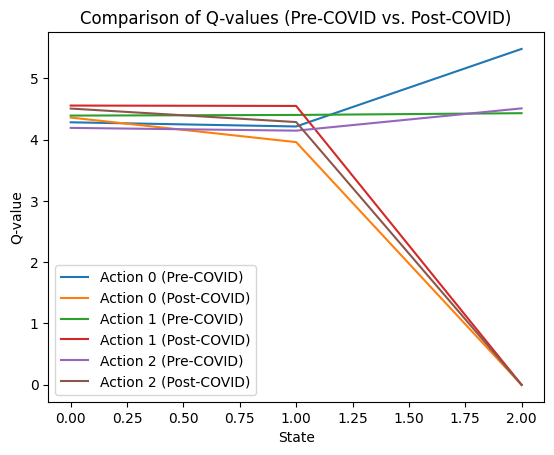

In [31]:
import matplotlib.pyplot as plt

# Assuming Q-tables are pre_qtable and post_qtable

num_states, num_actions = q_pretable.shape

# Plot Q-values for each action across all states
for action in range(num_actions):
  plt.plot(q_pretable[:, action], label=f"Action {action} (Pre-COVID)")
  plt.plot(q_posttable[:, action], label=f"Action {action} (Post-COVID)")

plt.xlabel("State")
plt.ylabel("Q-value")
plt.title("Comparison of Q-values (Pre-COVID vs. Post-COVID)")
plt.legend()
plt.show()

In [32]:
def compare_q_tables(q_table1, q_table2):
    # Ensure the Q-tables have the same dimensions
    assert q_pretable.shape == q_posttable.shape, "Q-tables must have the same dimensions"

    # Calculate the mean squared error (MSE)
    mse = np.mean(np.square(q_table1 - q_table2))

    return mse

mse = compare_q_tables(q_pretable, q_posttable)
print("MSE:", mse)

MSE: 7.813870539932803


In [33]:
def visualize_q_tables(q_table1, q_table2):
    assert q_table1.shape == q_table2.shape, "Q-tables must have the same dimensions"
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Q-Table Comparison')
    axs[0].imshow(q_pretable, cmap='hot')
    axs[0].set_title('Q-Table 1')
    axs[1].imshow(q_posttable, cmap='hot')
    axs[1].set_title('Q-Table 2')
    plt.show()

visualize_q_tables(q_pretable,q_posttable)

In [34]:
def find_directional_changes(pre_covid_q_table, post_covid_q_table):
    assert pre_covid_q_table.shape == post_covid_q_table.shape, "Q-tables must have the same dimensions"

    directional_changes = {}

    # Iterate over states and actions
    for state in range(pre_covid_q_table.shape[0]):
        for action in range(pre_covid_q_table.shape[1]):
            pre_covid_q_value = pre_covid_q_table[state, action]
            post_covid_q_value = post_covid_q_table[state, action]

            # Compare Q-values
            if post_covid_q_value > pre_covid_q_value:
                change_direction = "positive change"
            elif post_covid_q_value < pre_covid_q_value:
                change_direction = "negative change"
            else:
                change_direction = "no significant change"

            # Record directional change
            directional_changes[(state, action)] = change_direction

    return directional_changes

In [35]:
changes = find_directional_changes(q_pretable, q_posttable)

# Print directional changes
for (state, action), change_direction in changes.items():
    print(f"State {state}, Action {action}: {change_direction}")

State 0, Action 0: positive change
State 0, Action 1: positive change
State 0, Action 2: positive change
State 1, Action 0: negative change
State 1, Action 1: positive change
State 1, Action 2: positive change
State 2, Action 0: negative change
State 2, Action 1: negative change
State 2, Action 2: negative change
